In [1]:
from pygam.datasets import wage

X, y = wage()

In [4]:
X

array([[2.006e+03, 1.800e+01, 0.000e+00],
       [2.004e+03, 2.400e+01, 3.000e+00],
       [2.003e+03, 4.500e+01, 2.000e+00],
       ...,
       [2.005e+03, 2.700e+01, 0.000e+00],
       [2.005e+03, 2.700e+01, 2.000e+00],
       [2.009e+03, 5.500e+01, 1.000e+00]])

In [6]:
X.shape

(3000, 3)

In [7]:
y.shape

(3000,)

### Wage 데이터 변수들의 histogram

In [8]:

import pandas as pd
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.2)

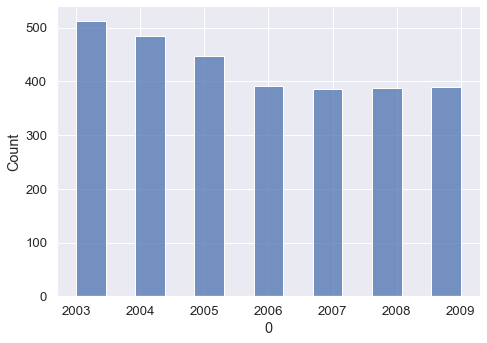

In [18]:
XX = pd.DataFrame(X)

sns.displot(XX[0], kind = 'hist', aspect = 1.4 )

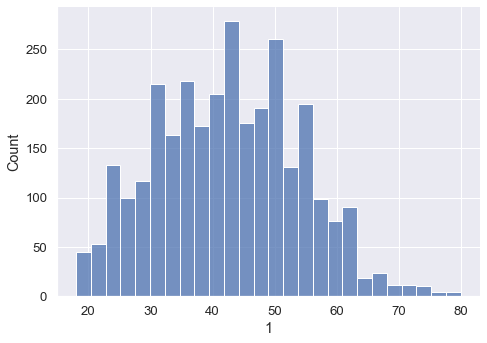

In [19]:
sns.displot(XX[1], kind = 'hist', aspect = 1.4 )

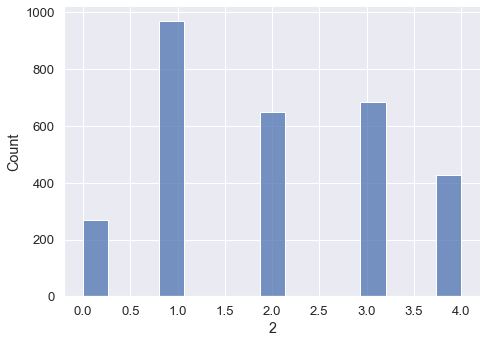

In [20]:
sns.displot(XX[2], kind = 'hist', aspect = 1.4 )

In [11]:
XX.head()

0     1    2
0  2006.0  18.0  0.0
1  2004.0  24.0  3.0
2  2003.0  45.0  2.0
3  2003.0  43.0  3.0
4  2005.0  50.0  1.0

In [12]:
XX[0]

0       2006.0
1       2004.0
2       2003.0
3       2003.0
4       2005.0
         ...  
2995    2008.0
2996    2007.0
2997    2005.0
2998    2005.0
2999    2009.0
Name: 0, Length: 3000, dtype: float64

### LinearGAM 테스트

In [23]:
from pygam import LinearGAM, s, f

gam = LinearGAM(s(0) + s(1) + f(2)).gridsearch(X, y)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


In [24]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.2602
Link Function:                     IdentityLink Log Likelihood:                                -24116.7451
Number of Samples:                         3000 AIC:                                            48274.0107
                                                AICc:                                           48274.2999
                                                GCV:                                             1250.3656
                                                Scale:                                           1235.9245
                                                Pseudo R-Squared:                                   0.2945
Feature Function                  Lam

<ipython-input-24-dec6a6acdaaa>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


### 첫번째 feature 를   categorical로 -> 차이가 없다

In [25]:
gam = LinearGAM(f(0) + s(1) + f(2)).gridsearch(X,y)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


In [26]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.1631
Link Function:                     IdentityLink Log Likelihood:                                -24116.6579
Number of Samples:                         3000 AIC:                                            48273.6421
                                                AICc:                                           48273.9286
                                                GCV:                                             1250.2558
                                                Scale:                                           1235.8887
                                                Pseudo R-Squared:                                   0.2945
Feature Function                  Lam

<ipython-input-26-dec6a6acdaaa>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


### spline 활용

In [28]:
gam = LinearGAM(f(0) + s(1, n_splines=5) + f(2)).gridsearch(X,y)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     13.7879
Link Function:                     IdentityLink Log Likelihood:                                -24122.8961
Number of Samples:                         3000 AIC:                                            48275.3678
                                                AICc:                                           48275.5243
                                                GCV:                                             1248.7876
                                                Scale:                                           1238.4609
                                                Pseudo R-Squared:                                   0.2918
Feature Function                  Lam

<ipython-input-28-befbc3b1223a>:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


### Pygam plotting

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

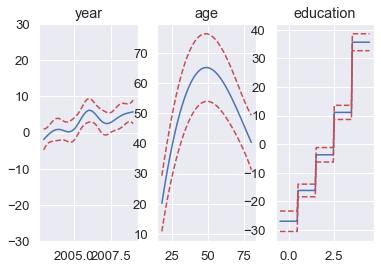

In [30]:
X, y = wage(return_X_y=True)

## model
gam = LinearGAM(s(0) + s(1, n_splines=5) + f(2))
gam.gridsearch(X, y)


## plotting
plt.figure();
fig, axs = plt.subplots(1,3);

titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

In [32]:
from pygam.datasets import toy_classification

X, y = toy_classification(return_X_y=True, n=5000)

In [33]:
X.shape

(5000, 6)